# Descripción del proyecto 

Estamos trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Nuestra tarea es encontrar patrones en la información disponible. Queremos comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizaremos los datos de los competidores y probaremos una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

Este proyecto consta de 3 partes: la primera consiste en realizar un código para analizar los datos meteorológicos, extrayendo datos de una tabla de un sitio web. La segunda parte consiste en formular consultas en lenguaje SQL a fin de crear nuevas tablas con información relevante de las principales empresas de taxis en términos de recorrido. Por último, procesaremos estas tablas en lenguaje python para analizar la información de empresas de taxis, tiempo de recorrido y datos referente al clima, lo que nos permitirá formular Hipótesis respecto a la duración media de los viajes en un clima determinado.

## Análisis exploratorio de datos (Python)

Además de los datos que recuperamos en las consultas de las tareas anteriores tenemos 3 archivos CSV:

project_sql_result_01.csv. Contiene los siguientes datos:

* company_name: nombre de la empresa de taxis
* trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

project_sql_result_04.csv. Contiene los siguientes datos:

* dropoff_location_name: barrios de Chicago donde finalizaron los viajes
* average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

project_sql_result_07.csv — el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:

* start_ts: fecha y hora de la recogida
* weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
* duration_seconds: duración del viaje en segundos

### Inicialización

In [1]:
#Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns 

### Importar archivos

In [2]:
df_01 = pd.read_csv('/datasets/project_sql_result_01.csv')
df_01

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [3]:
df_04 = pd.read_csv('/datasets/project_sql_result_04.csv')
df_04

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [4]:
df_07 = pd.read_csv('/datasets/project_sql_result_07.csv')
df_07

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [5]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Observamos que la tabla "df_01" presenta tipos de datos correctos.

In [6]:
df_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Observamos que la tabla "df_04" presenta tipos de datos correctos.

In [7]:
df_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Observamos que la tabla "df_07" presenta un tipo de dato "object" en la columna "duration_seconds". Cambiaremos el tipo de dato de esta columna a "datetime".

In [8]:
#Cambiaremos el tipo de dato de la columna "churn_date" a tipo datetime

df_07['start_ts'] = pd.to_datetime(df_07['start_ts'], format='%Y-%m-%d %H:%M:%S')
df_07.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [9]:
df_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


### 10 principales barrios en terminos de finalización de recorrido

In [10]:
df_04.sort_values(by = "average_trips" , ascending = False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<AxesSubplot:xlabel='dropoff_location_name'>

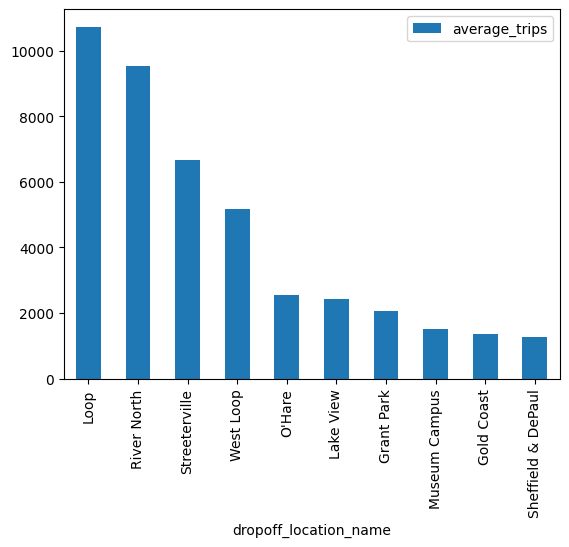

In [11]:
df_04.sort_values(by = "average_trips" , ascending = False).head(10).plot(x='dropoff_location_name',kind="bar")

Observamos que el principal barrio en términos de finalización de recorrido corresponda a "Loop".

### Empresas de taxis y sus número de viajes

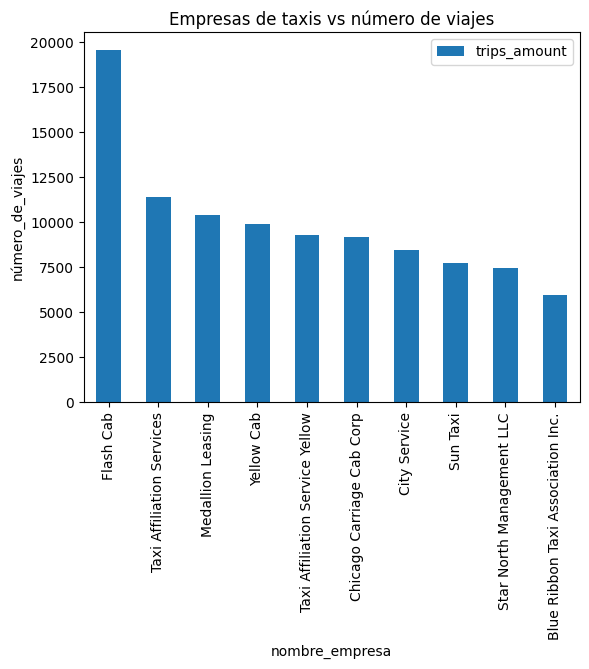

In [12]:
df_01.head(10).plot(x='company_name',kind="bar",title='Empresas de taxis vs número de viajes',xlabel='nombre_empresa',ylabel='número_de_viajes')
plt.show() 

Del 1 al 7 de noviembre de 2017, las empresas de taxis más populares fueron Flash Cab y Taxi Affiliation Services.

### Prueba de Hipótesis

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Hipotesis 1:

1. Formular la hipotesis nula y alternativa:
* HO: La duración promedio de los viajes desde el Loop hasta el Aeropuerto internacional O'Hare no cambia los días lluviosos.
* H1: La duración promedio de los viajes .... son distintas.
2. Obtener la informacion que deseamos
* Necesitamos tener los datos en dos series separadas y SIN valores ausentes

In [13]:
days_good = df_07[df_07['weather_conditions'] == 'Good']['duration_seconds'].dropna()
days_bad = df_07[df_07['weather_conditions'] == 'Bad']['duration_seconds'].dropna()

* Necesitamos realizar una prueba de Levene para verificar si varianzas son iguales o no.

In [14]:
from scipy.stats import levene


# Realizar la prueba de Levene
estadistico, p_valor = levene(days_good, days_bad)

# Mostrar los resultados
print("Estadístico de Levene:", estadistico)
print("P-valor:", p_valor)

if p_valor > 0.05:
    print("No se rechaza la hipótesis nula. Las varianzas son iguales.")
else:
    print("Se rechaza la hipótesis nula. Las varianzas son diferentes.")

Estadístico de Levene: 0.38853489683656073
P-valor: 0.5332038671974493
No se rechaza la hipótesis nula. Las varianzas son iguales.


3. definir el test y el nivel de significancia.
- Usamos el nivel de significancia estandar de $\alpha$ de 0.05
- Comparar dos categorias (Good y Bad) con respecto a una variable numerica (duration_seconds), en donde desconoces las
  desviaciones standar por lo que podemos usar el t-test.

In [15]:
from scipy.stats import ttest_ind

In [16]:
alpha = 0.05
stat, p_value = ttest_ind(
days_good,
days_bad
)
print(f"""
    La duración promedio de de viajes para los días no lluviosos es: {days_good.mean()}
    La duración promedio de viajes para los días lluviodos es: {days_bad.mean()}
    
    t-statistic: {stat}
    p-value: {p_value}
""")
    
if p_value < alpha:
    print('Rechazamos nuestra hipótesis nula, la duración promedio de los viajes cambia en días lluviosos.')
else:
    print('No rechazamos nuestra hipótesis nula, la duración promedio de los viajes no cambia en días lluviosos.')


    La duración promedio de de viajes para los días no lluviosos es: 1999.6756756756756
    La duración promedio de viajes para los días lluviodos es: 2427.2055555555557
    
    t-statistic: -6.946177714041499
    p-value: 6.517970327099473e-12

Rechazamos nuestra hipótesis nula, la duración promedio de los viajes cambia en días lluviosos.


## Conslusiones

De los resultados del test de Hipotesis podemos concluir que el promedio de viajes para los días lluviosos es mayor a los días no lluviosos en un 18% aproximadamente. Se realizó un test de hipótesis para confirmar que hay diferencia significativa en la duración de los viajes para los días lluviosos a un 5% de significancia. Por otro lado pudimos verificar que la principal empresa de taxis en terminos de cantidad de recorridos corresponde a "Flash cab", y que el principal barrio en términos de finalizacoión de recorrido corresponde a "Loop".